# 6.3 Geographic Visualization 

### ※ Disclaimer: State ID  data is not genuine and I made it for the purpose of the exercise.


### 1. Importing data and libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import geopandas as gpd
from geopandas import GeoDataFrame
import fiona
import shapely
import pyproj
from osgeo import gdal

In [7]:
# This command prompts matplotlib visuals to appear in the notebook.

%matplotlib inline

In [8]:
# Creat path
path = r'D:\ドキュメント\Study\CareerFoundry\Achievement 6'

In [9]:
# Import the recipes data.

df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','vehicle loan customer_cleansed.csv'), index_col = False)

In [10]:
# Import ".shp" file for india. shape outline using the Geopandas `read_csv` command.

India = gpd.read_file(os.path.join(path, '02 Data', 'Original Data', 'maps-master','States'))

In [11]:
# import state ID ※

id = pd.read_excel(os.path.join(path, '02 Data','Original Data','india state.xlsx'), index_col = False)

### 2. Data wrangling and merging

##### Fix dummy columns

In [12]:
India_with_id = India.merge(id, on = ['ST_NM'], indicator = False)

In [13]:
India_with_id

,ST_NM,geometry,State_ID
0,Assam,"POLYGON ((95.97166 27.96254, 95.97174 27.96227...",15
1,Karnataka,"POLYGON ((77.32647 18.45884, 77.32648 18.45803...",8
2,Meghalaya,"POLYGON ((91.82534 26.11950, 91.82610 26.11935...",22
3,Punjab,"POLYGON ((75.83873 32.51270, 75.84163 32.51123...",16
4,Rajasthan,"POLYGON ((73.97324 30.12272, 73.97508 30.12008...",7
5,Tripura,"POLYGON ((92.16804 24.52749, 92.16892 24.52718...",21
6,Uttarakhand,"POLYGON ((79.07185 31.45610, 79.07263 31.45519...",19
7,Telangana,"POLYGON ((78.32306 19.91679, 78.32434 19.91674...",12
8,Bihar,"POLYGON ((84.10851 27.52135, 84.10899 27.52069...",3
9,Kerala,"POLYGON ((74.98962 12.79555, 74.99124 12.79561...",13


In [14]:
df_marged = df.merge(India_with_id, on = ['State_ID'], indicator = True )

In [15]:
# creat data frame with only defaulted customers

defaulted = df_marged[df_marged['loan_default']==True]

In [16]:
defaulted.shape

(50611, 33)

### 3. Data cleaning

In [17]:
# Check for missing values.

df_marged.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                          0
PRI.OVERDUE.ACCTS                         0
PRI.CURRENT.BALANCE                       0
PRI.SANCTIONED.AMOUNT                     0
PRI.DISBURSED.AMOUNT            

### 4. Plotting a choropleth

In [18]:
# counts number of defaulted customer by states

def_map = defaulted['ST_NM'].value_counts().reset_index()
def_map.columns=['ST_NM', 'count']

In [19]:
def_map

,ST_NM,count
0,West Bengal,9326
1,Tamil Nadu,6890
2,Bihar,6345
3,Kerala,5483
4,Gujarat,3492
5,Karnataka,3258
6,Jharkhand,2597
7,Madhya Pradesh,2023
8,Uttar Pradesh,1583
9,Odisha,1373


In [20]:
def_map.to_csv(os.path.join(path, '02 Data','Prepared Data','nr_of_default_in_india.csv'))

In [21]:
# merge with shapefile

de_india = def_map.merge(India_with_id, how='left', on = ['ST_NM'])

In [22]:
de_india.to_csv(os.path.join(path, '02 Data','Prepared Data','nr_of_default_in_india.csv'))

In [16]:
# change data frame to recoginased by matplotlib

de_india = GeoDataFrame(de_india)

In [17]:
# make sure data type

de_india.dtypes

ST_NM         object
count          int64
geometry    geometry
State_ID       int64
dtype: object

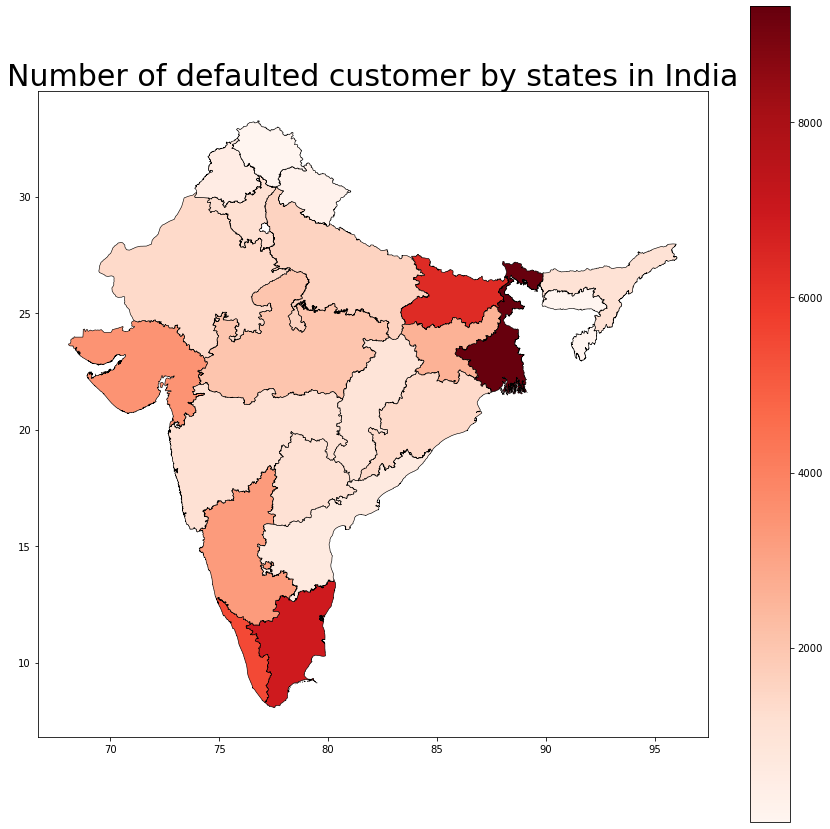

In [18]:
# Create a subplot with `fig` and `ax`.
fig, ax = plt.subplots(1, figsize=(15, 15))

tl = de_india.plot(column='count',
cmap='Reds',      # Color map for the states                     
             linewidth=0.6,      # Line width for state borders
             ax=ax,              # Plotting the map on `ax`
             edgecolor='black'); # State border colors

plt.title('Number of defaulted customer by states in India', size=30)

# Plot the colorbar.
c_bar_colors = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=de_india['count'].min(), vmax=de_india['count'].max()))
color_bar = fig.colorbar(c_bar_colors)

### Question 1. Does the analysis answer any of your existing research questions?

#### This analysis answers the question of Which area has the highest number of defaults.　

### Question 2. Does the analysis lead you to any new research questions?

#### The analysis leads me to a new research question that is the cause of differentiating the number of default customers.